Data de RH
Info de empleados
Renuncian a su trabajo, buscar ha que se relacionan
puede ser satisfaccion 1 al 5
desempeño del 0 al 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/b04_hr.xlsx')

In [3]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   area                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [20]:
tabla = pd.crosstab(df['left'], df['promotion_last_5years'])
tabla

promotion_last_5years,0,1
left,,
0,11128,300
1,3552,19


In [21]:
# Modifica la tabla anterior para mostrar las cantidades *normalizadas* entre el total
tabla = pd.crosstab(df['left'], df['promotion_last_5years'], normalize='index')
tabla

promotion_last_5years,0,1
left,,
0,0.973749,0.026251
1,0.994679,0.005321


In [22]:
import numpy as np
from scipy.stats import chi2_contingency

In [25]:
# Realiza una prueba chi cuadrada a la tabla obtenida
chi2, p, dof, expected = chi2_contingency(tabla)

In [26]:
print('Estadístico de prueba \t', chi2) 
print('Valor p \t \t', p)  
print('Grados de libertad \t', dof)  
print('\n Tabla de frecuencias esperadas:')   
print(expected)

Estadístico de prueba 	 0.0
Valor p 	 	 1.0
Grados de libertad 	 1

 Tabla de frecuencias esperadas:
[[0.98421402 0.01578598]
 [0.98421402 0.01578598]]


In [27]:
alfa = 0.05
if p <=alfa:
    print('Las variables son dependientes (Se rechaza la hipótesis nula)')
else:
    print('Las variables son independientes (No se rechaza la hipótesis nula)')

Las variables son independientes (No se rechaza la hipótesis nula)


In [28]:
import seaborn as sns

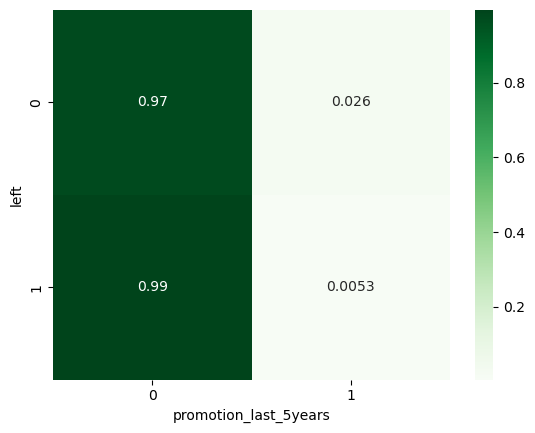

In [29]:
ax = sns.heatmap(tabla, annot=True, cmap='Greens')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   area                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [30]:
import prince

In [37]:
var_cat = ['left', 'area', 'promotion_last_5years']

In [38]:
# Creación de instancia del modelo
mca = prince.MCA(n_components = 2)
# Ajuste del modelo a los datos
mca = mca.fit(df[var_cat])
# Crea gráfico
ax = mca.plot(df[var_cat], show_column_labels=True, show_row_markers=False)
ax

alt.LayerChart(...)